In [1]:
from sklearn.model_selection import train_test_split


import Controlers.GetLabeledData as get 
from Models.Polygon import Polygon 
import cv2
from ToothClassifier import BuildDataSet, ToothClassifier


X,Y = BuildDataSet()

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,random_state=0)

In [2]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## SVM

In [3]:
SVM_classifier=svm.SVC(kernel='rbf',C=1,gamma='auto')
SVM_classifier.fit(X_train,y_train)

SVC(C=1, gamma='auto')

In [4]:
print(SVM_classifier.score(X_train,y_train))
print(SVM_classifier.score(X_test, y_test))

0.5366666666666666
0.6


## Random forest

**Parameters:**

- n_estimators: 森林中樹木的數量，預設=100。
- max_features: 劃分時考慮的最大特徵數，預設auto。
- criterion: 亂度的評估標準，gini/entropy。預設為gini。
- max_depth: 樹的最大深度。
- splitter: 特徵劃分點選擇標準，best/random。預設為best。
- random_state: 亂數種子，確保每次訓練結果都一樣，splitter=random 才有用。
- min_samples_split: 至少有多少資料才能再分
- min_samples_leaf: 分完至少有多少資料才能分

**Attributes:**

- feature_importances_: 查詢模型特徵的重要程度。
**Methods:**
- fit: 放入X、y進行模型擬合。
- predict: 預測並回傳預測類別。
- score: 預測成功的比例。
- predict_proba: 預測每個類別的機率值。
- get_depth: 取得樹的深度。

In [3]:
from sklearn.ensemble import RandomForestClassifier

# 建立 Random Forest Classifier 模型
randomForestModel = RandomForestClassifier(n_estimators=100, criterion = 'gini',n_jobs = -1,random_state =50, min_samples_leaf = 10)
# 使用訓練資料訓練模型
randomForestModel.fit(X_train, y_train)
# 使用訓練資料預測分類
predicted = randomForestModel.predict(X_train)

In [4]:
print('訓練集: ',randomForestModel.score(X_train,y_train))
print('測試集: ',randomForestModel.score(X_test,y_test))
print('特徵重要程度: ',randomForestModel.feature_importances_)

訓練集:  0.8266666666666667
測試集:  0.7066666666666667
特徵重要程度:  [0.16798287 0.22467562 0.24860001 0.08170835 0.01792599 0.17912843
 0.07997874]


c:\gits\SMILE_tmp/app/TrainData/labeled/image/2023-09-19-14-32-26.png


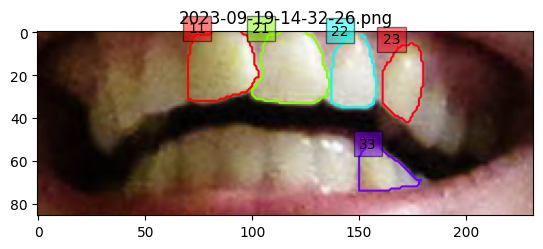

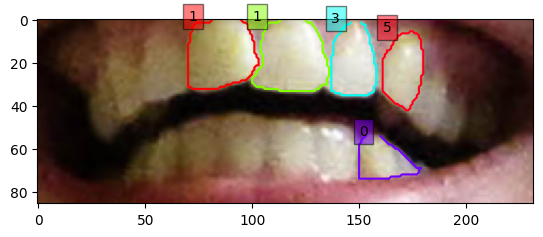

In [7]:
p,m,l = get.show_sample()

predict=randomForestModel.predict(ToothClassifier.get_feature_masks(p,m))


currentAxis = plt.gca()
plt.imshow(plt.imread(p))
colors=plt.cm.hsv(np.linspace(0, 1, len(l))).tolist()
#colors= rd.shuffle(colors)

for m,l,c in zip(m,predict,colors):
    m=np.array(m)
    plt.plot(m[:,0],m[:,1],color=c)
    currentAxis.text(min(m[:,0]), min(m[:,1]), l,bbox={'facecolor': c, 'alpha': 0.5})
plt.show()

### 輸出模型

In [8]:
import joblib
from config import OUTPUT_DIR
joblib.dump(randomForestModel, OUTPUT_DIR+'random_forest_model.joblib')


['c:\\gits\\SMILE_tmp/output/random_forest_model.joblib']

### 載入模型

In [10]:
from config import RANDOM_FOREST_MODEL
import Controlers.GetLabeledData as get 
from ToothClassifier import ToothClassifier
import joblib
import matplotlib.pyplot as plt
import numpy as np

loaded_model = joblib.load(RANDOM_FOREST_MODEL)


c:\gits\SMILE_tmp/app/TrainData/labeled/image/2023-09-19-14-34-13.png


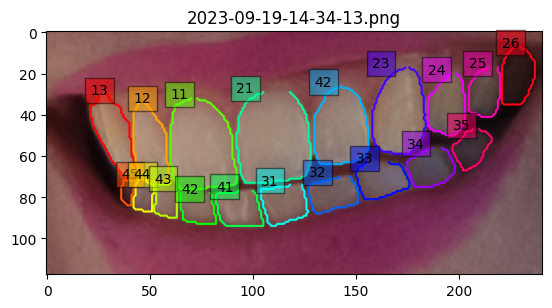

class error
class error
class error


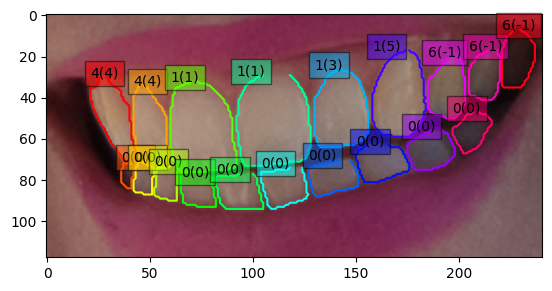

In [12]:
p,m,l = get.show_sample()

predicts=loaded_model.predict_proba(ToothClassifier.get_feature_masks(p,m))




result=[[] for i in range(6)]




now=predicts.copy()
#END=0

def add(tooth):
    #global END
    cls=np.argmax(now[tooth])
    #if  END>100:
        #return
    if cls>5:
        print('class error')
        return
    result[cls].append(tooth)
    if cls in (0,5) or len(result[cls])<3:
        #print(f'{tooth=},{cls=}')
        return
    
    member=np.array(result[cls])
    argpmin=np.argmin([now[t][cls] for t in member])
    pmin=member[argpmin]
    result[cls][argpmin]=result[cls][-1]
    result[cls].pop()
    now[pmin][cls]=0

    #print(f'gg,{cls=},{pmin=},{result[cls]=}')
    #END+=1

    add(pmin)

for i in range(len(predicts)):
    add(i)

correct=[-1 for i in range(len(l))]


for i in range(len(result)):
    for t in result[i]:
        try:
            correct[t]=i
        except:
            print(f'{t=}, {result=}')


currentAxis = plt.gca()
plt.imshow(plt.imread(p))
colors=plt.cm.hsv(np.linspace(0, 1, len(l))).tolist()   
i=0 
for m,pd,cpd,c in zip(m,predicts,correct,colors):
    m=np.array(m)
    plt.plot(m[:,0],m[:,1],color=c)
    currentAxis.text(min(m[:,0]), min(m[:,1]), f'{np.argmax(pd)}({cpd})',bbox={'facecolor': c, 'alpha': 0.5})
    i+=1

plt.show()



In [32]:
result

[[], [2, 3, 4], [1], [5], [0], [6]]

[[]]